# Auto Arima
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [ ]:
!pip install pmdarima

In [4]:
from pmdarima.arima import auto_arima

In [5]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.26 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [6]:
print(stepwise_model.aic())

1019.1780567487713


In [7]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [8]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [9]:
future_forecast = stepwise_model.predict(n_periods=12)

In [10]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

In [11]:
pd.concat([test,future_forecast],axis=1).plot()
plt.show()

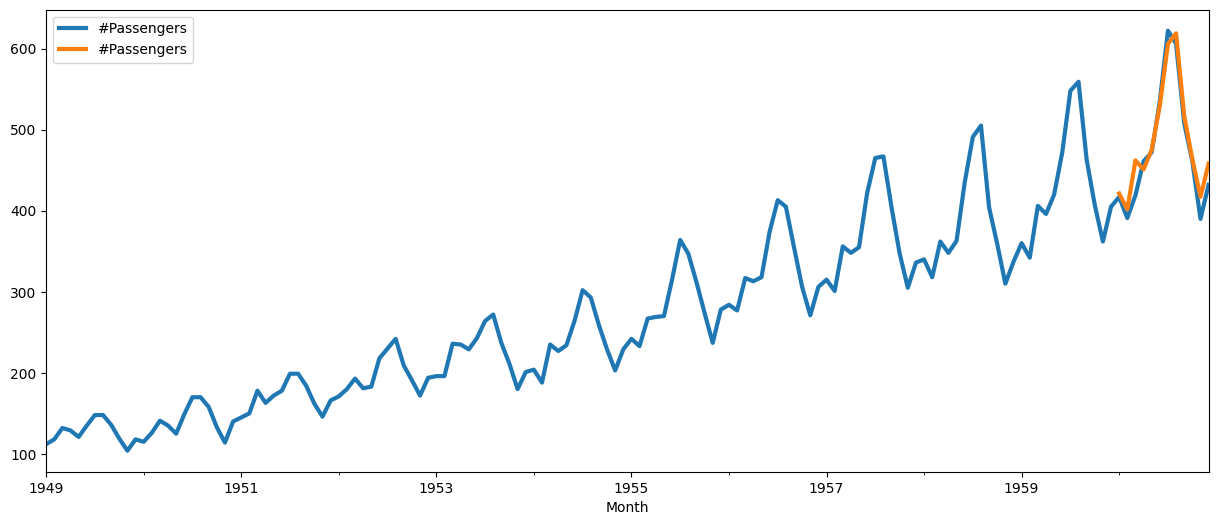

In [12]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)
plt.show()